In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr

In [54]:

def reglinedemo(n=20):
    x = np.arange(n)+1
    e = np.random.normal(0, 1, n)
    y = 2 + 0.5 * x + e
    x1 = sm.add_constant(x)
    fm = sm.OLS(y, x1).fit()
    plt.plot(x, y, ".", x, fm.fittedvalues,'r-')
    for i in range(len(x)):
        plt.vlines(x, y, fm.fittedvalues, linestyles='dotted', colors='b')

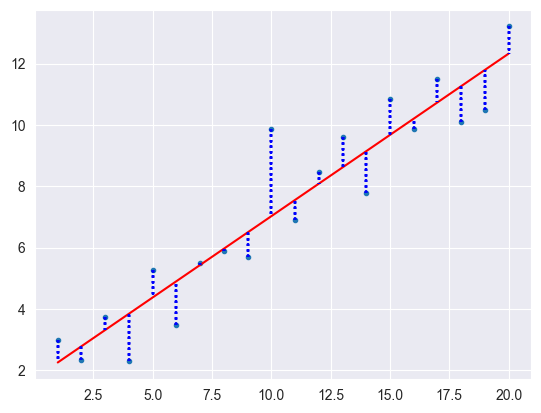

In [5]:
np.random.seed(12)
reglinedemo(20)

In [3]:
BS=pd.read_excel('DaPy_data.xlsx','BSdata')[['性别','身高','体重','支出']];

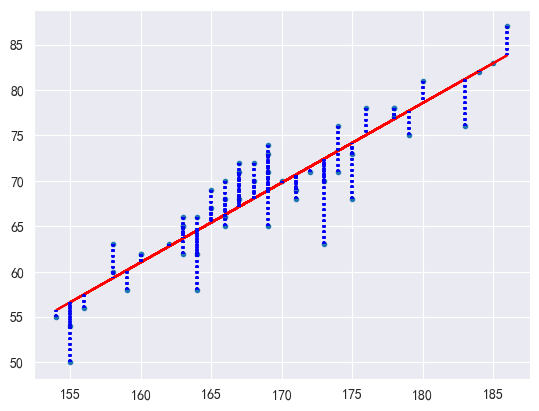

In [61]:

def reglinedemo2():
    x=BS.身高
    y=BS.体重
    fm1=sm.OLS(y,sm.add_constant(x)).fit()
    yfit=fm1.fittedvalues
    plt.plot(x, y,".",x,yfit,'r-')#添加回归线，红色
    for i in range(len(x)):#画垂直线
        plt.vlines(x,y,yfit,linestyles='dotted',colors='b')
reglinedemo2()

PearsonRResult(statistic=np.float64(0.043881130759588945), pvalue=np.float64(0.75740670779405))

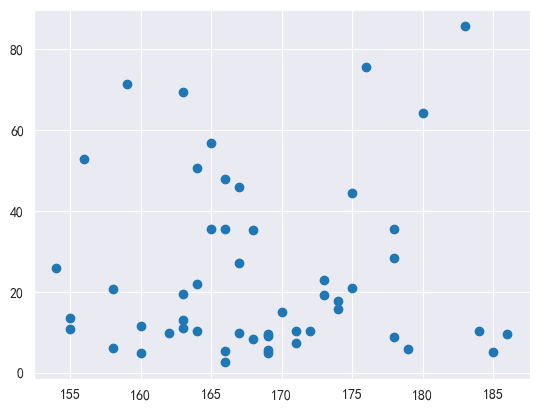

In [39]:
plt.plot(BS['身高'],BS['支出'],'o')
st.pearsonr(BS.身高,BS.支出)

In [4]:
BS_M=BS [BS.性别=='男'][['身高','体重']]
BS_F=BS [BS.性别=='女'][['身高','体重']]

In [11]:

M_r=st.pearsonr(BS_M.身高,BS_M.体重);M_r

PearsonRResult(statistic=np.float64(0.9105200024864896), pvalue=np.float64(4.436573398374303e-11))

In [12]:
st.pearsonr(BS_F.身高,BS_F.体重)

PearsonRResult(statistic=np.float64(0.8931328371576219), pvalue=np.float64(1.907324154689925e-09))

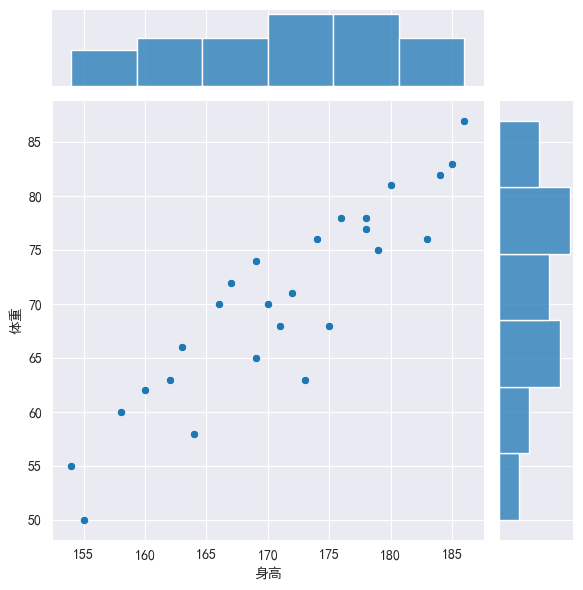

In [13]:

plt.rcParams['font.sans-serif']=['SimHei']
sns.jointplot(x='身高',y='体重',data=BS_M)

In [71]:
fm2 = smf.ols('体重~身高',data=BS).fit()
fm2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-79.2828,9.422,-8.415,0.000,-98.207,-60.359
身高,0.8769,0.056,15.703,0.000,0.765,0.989


In [72]:
fm2.predict(pd.DataFrame({'身高':[170,180,190]}))

0    69.798560
1    78.568053
2    87.337546
dtype: float64

C:\Users\mengyonghao\PycharmProjects\pytorch_projects\work\.venv\Lib\site-packages\seaborn\axisgrid.py:1766: UserWarning: Glyph 36523 (\N{CJK UNIFIED IDEOGRAPH-8EAB}) missing from font(s) Arial.
  f.tight_layout()
C:\Users\mengyonghao\PycharmProjects\pytorch_projects\work\.venv\Lib\site-packages\seaborn\axisgrid.py:1766: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) Arial.
  f.tight_layout()
C:\Users\mengyonghao\PycharmProjects\pytorch_projects\work\.venv\Lib\site-packages\seaborn\axisgrid.py:1766: UserWarning: Glyph 20307 (\N{CJK UNIFIED IDEOGRAPH-4F53}) missing from font(s) Arial.
  f.tight_layout()
C:\Users\mengyonghao\PycharmProjects\pytorch_projects\work\.venv\Lib\site-packages\seaborn\axisgrid.py:1766: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) Arial.
  f.tight_layout()


C:\Users\mengyonghao\PycharmProjects\pytorch_projects\work\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 36523 (\N{CJK UNIFIED IDEOGRAPH-8EAB}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\mengyonghao\PycharmProjects\pytorch_projects\work\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\mengyonghao\PycharmProjects\pytorch_projects\work\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 20307 (\N{CJK UNIFIED IDEOGRAPH-4F53}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\mengyonghao\PycharmProjects\pytorch_projects\work\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\mengyonghao\PycharmProjects\pytorch_projects\work\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserW

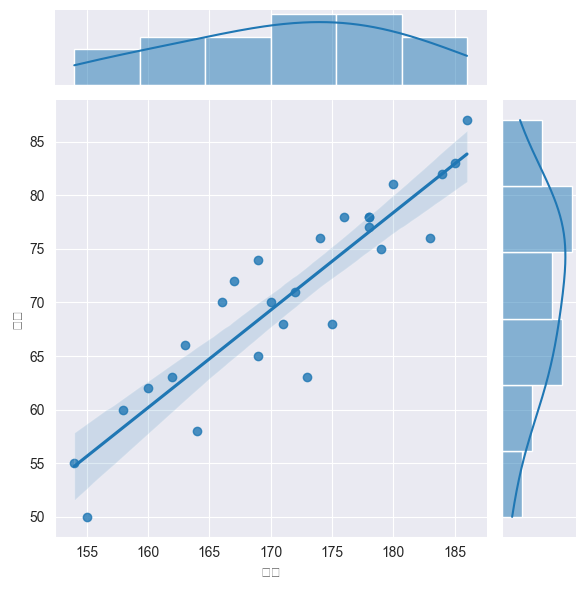

In [10]:
smf.ols('体重~身高',BS_F).fit().summary2().tables[1]
sns.jointplot(x='身高',y='体重',data=BS_M,kind='reg')

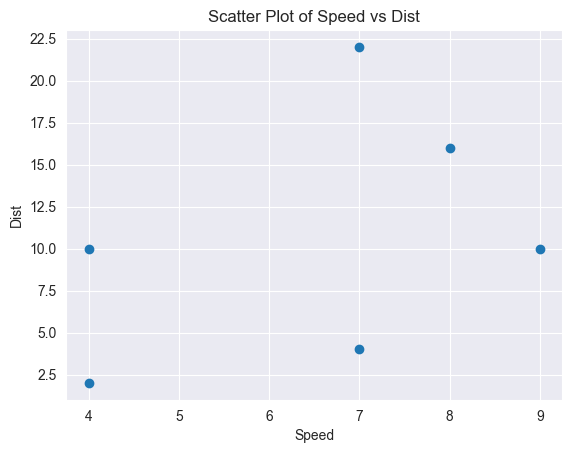

In [20]:
# 数据
speed = pd.DataFrame({'speed':[4, 4, 7, 7, 8, 9]})
dist = pd.DataFrame({'dist': [2, 10, 4, 22, 16, 10]})


# 绘制散点图
plt.scatter(speed, dist)
plt.xlabel("Speed")
plt.ylabel("Dist")
plt.title("Scatter Plot of Speed vs Dist")
plt.show()


In [21]:
# 计算相关系数
correlation, p_value = pearsonr(speed, dist)
print("相关系数:", correlation)
print("p值:", p_value)

# 判断是否显著
if p_value < 0.05:
    print("相关系数显著，不接受原假设。")
else:
    print("相关系数不显著，接受原假设。")

相关系数: [0.41440951]
p值: [0.41397009]
相关系数不显著，接受原假设。


In [23]:
# 构造回归模型
X = sm.add_constant(speed)
model = sm.OLS(dist, X).fit()
print(model.tvalues,model.pvalues)

# 输出回归结果
print(model.summary())


const    0.089679
speed    0.910700
dtype: float64 const    0.932853
speed    0.413970
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   dist   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                 -0.035
Method:                 Least Squares   F-statistic:                    0.8294
Date:                Mon, 18 Nov 2024   Prob (F-statistic):              0.414
Time:                        19:23:04   Log-Likelihood:                -19.449
No. Observations:                   6   AIC:                             42.90
Df Residuals:                       4   BIC:                             42.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

C:\Users\mengyonghao\PycharmProjects\pytorch_projects\work\.venv\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [24]:
# 预测
speed_new = pd.DataFrame({'speed':[30,0]}) # 预测数据，需转换为数组# 添加常数项并调整形状
speed_new = sm.add_constant(speed_new)
dist_pred = model.predict(speed_new)  # 进行预测
print(dist_pred)
print("当 speed=30 时，预测的 dist 值为:", dist_pred[0])


0    45.643411
1     0.992248
dtype: float64
当 speed=30 时，预测的 dist 值为: 45.64341085271317


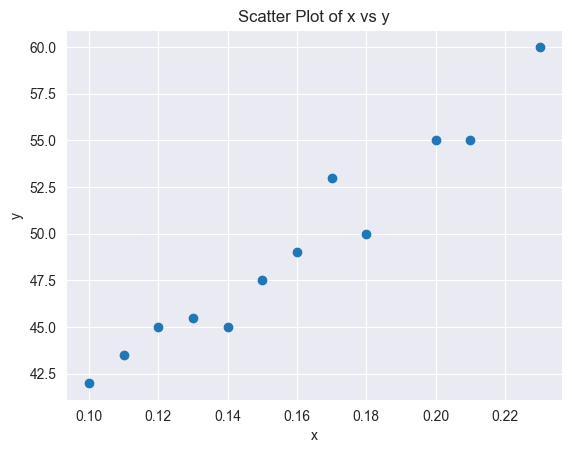

In [25]:
# 数据
x = pd.DataFrame({'x':[0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.20, 0.21, 0.23]})
y = pd.DataFrame({'y': [42, 43.5, 45, 45.5, 45, 47.5, 49, 53, 50, 55, 55, 60]})


# 绘制散点图
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot of x vs y")
plt.show()


In [26]:
import numpy as np
from scipy.stats import pearsonr

# 计算相关系数
correlation, p_value = pearsonr(x, y)
print("相关系数:", correlation)
print("p值:", p_value)

# 判断是否显著
if p_value < 0.05:
    print("相关系数显著，接受原假设。")
else:
    print("相关系数不显著，不接受原假设。")

相关系数: [0.97368716]
p值: [9.50489025e-08]
相关系数显著，接受原假设。


In [27]:
# 构造回归模型
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
print(model.tvalues,model.pvalues)

# 输出回归结果
print(model.summary())


const    18.035644
x        13.511278
dtype: float64 const    5.881686e-09
x        9.504890e-08
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     182.6
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           9.50e-08
Time:                        19:23:10   Log-Likelihood:                -19.260
No. Observations:                  12   AIC:                             42.52
Df Residuals:                      10   BIC:                             43.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

C:\Users\mengyonghao\PycharmProjects\pytorch_projects\work\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [28]:
x_new = pd.DataFrame({'speed':[0.22,0.25]})
x_new = sm.add_constant(x_new)# 预测数据，需转换为数组# 添加常数项并调整形状
y_pred = model.predict(x_new)  # 进行预测
print(y_pred)

0    57.276481
1    61.201526
dtype: float64
